# Sleep EEG events detection

## Intoductory notes:
This notebook presents events detection functionality:
* Spindle detection
* Slow wave detection
* Rapid eye movement detection

Recommended readings:
1. [YASA: FAQ](https://raphaelvallat.com/yasa/build/html/faq.html#event-detection)
2. [YASA: Spindle detection on specific sleep stages](https://github.com/raphaelvallat/yasa/blob/master/notebooks/03_spindles_detection_NREM_only.ipynb)
3. [YASA: SpindlesResults class](http://raphaelvallat.com/yasa/build/html/generated/yasa.SpindlesResults.html#yasa.SpindlesResults)
4. [YASA: Multi-channel slow-wave detection](https://github.com/raphaelvallat/yasa/blob/master/notebooks/06_sw_detection_multi.ipynb)
5. [YASA: SWResults class](https://raphaelvallat.com/yasa/build/html/generated/yasa.SWResults.html#yasa-swresults)
6. [YASA: Rapid Eye Movements (REMs) detection](https://github.com/raphaelvallat/yasa/blob/master/notebooks/07_REMs_detection.ipynb)
7. [YASA: REMResults class](https://raphaelvallat.com/yasa/build/html/generated/yasa.REMResults.html#yasa.REMResults)

## Import data

### Import module
Add pipeline module to path and import its elements (just run this cell).

In [1]:
%matplotlib widget
import sys
sys.path.append('../sleepeeg/')
from pipeline import EventsPipe

### Initialize SpectralPipe object
`path_to_eeg` - can be any type of eeg file that MNE's [read_raw](https://mne.tools/stable/generated/mne.io.read_raw.html) function supports.

`output_directory` - a directory you want the results to be saved in

`path_to_hypno` - point-per-row type of hypnogram

`hypno_freq` - hypnogram's sampling frequency (visbrain's hypnograms default to 1)

In [2]:
events_pipe = EventsPipe(
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_new_raw.fif",
    output_dir=r"C:\Users\Gennadiy\Documents\data\HZ4\processing",
    path_to_hypno=r"C:\Users\Gennadiy\Documents\data\HZ4\staging.txt",
    hypno_freq=1
    )

Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_new_raw.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 0 ... 2032249 =      0.000 ...  8128.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_new_raw-1.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 2032250 ... 2229772 =   8129.000 ...  8919.088 secs
Ready.


31-Mar-23 17:22:13 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


## Spindles detection

In [3]:
events_pipe.spindles_detect(
    picks="eeg",
    include=(1, 2, 3),
    freq_sp=(12, 15),
    freq_broad=(1, 30),
    duration=(0.5, 2),
    min_distance=500,
    thresh={"corr": 0.65, "rel_pow": 0.2, "rms": 1.5},
    multi_only=False,
    remove_outliers=False,
    save=True
)

31-Mar-23 17:22:24 | ERROR | Wrong data amplitude for VREF (trimmed STD = 0.000). Unit of data MUST be uV! Channel will be skipped.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 257 out of 257 | elapsed:   10.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0

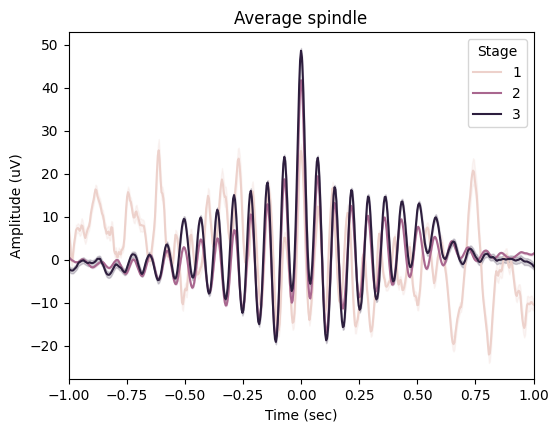

In [4]:
events_pipe.plot_spindles_average(save=True, hue="Stage")

interactive(children=(IntSlider(value=0, description='Epoch:', layout=Layout(align_items='center', justify_con…

<function yasa.detection._DetectionResults.plot_detection.<locals>.update(epoch, amplitude, channel, win_size, filt)>

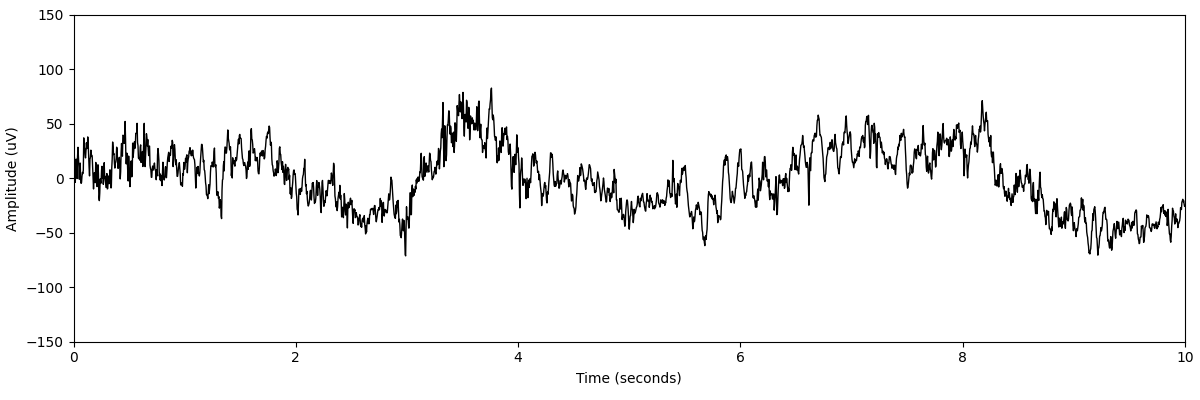

In [5]:
events_pipe.spindles.plot_detection()

## Slow wave detection

In [6]:
events_pipe.sw_detect(
    picks="eeg",
    include=(1, 2, 3),
    freq_sw=(0.3, 1.5),
    dur_neg=(0.3, 1.5),
    dur_pos=(0.1, 1),
    amp_neg=(40, 200),
    amp_pos=(10, 150),
    amp_ptp=(75, 350),
    coupling=False,
    coupling_params={"freq_sp": (12, 16), "p": 0.05, "time": 1},
    remove_outliers=False,
    save=True,
)

31-Mar-23 17:31:21 | ERROR | Wrong data amplitude for VREF (trimmed STD = 0.000). Unit of data MUST be uV! Channel will be skipped.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 257 out of 257 | elapsed:   10.4s finished
31-Mar-23 17:31:35 | WARNING | No SW were found in channel E9.
31-Mar-23 17:31:36 | WARNING | No SW were found in channel E17.
31-Mar-23 17:31:37 | WARNING | No SW were found in channel E44.
31-Mar-23 17:31:37 | WARNING | No SW were found in channel E45.
31-Mar-23 17:31:40 | WARNING | No SW were found in channel E81.
31-Mar-23 17:31:43 | WARNING | No SW were found in channel E132.
31-Mar-23 17:

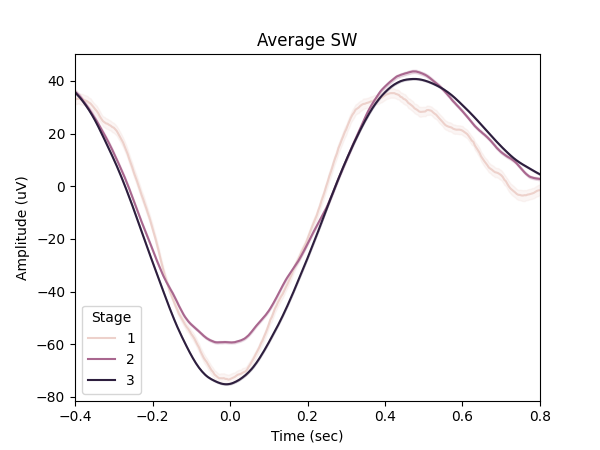

In [7]:
events_pipe.plot_slow_waves_average(save=True, hue="Stage")

interactive(children=(IntSlider(value=0, description='Epoch:', layout=Layout(align_items='center', justify_con…

<function yasa.detection._DetectionResults.plot_detection.<locals>.update(epoch, amplitude, channel, win_size, filt)>

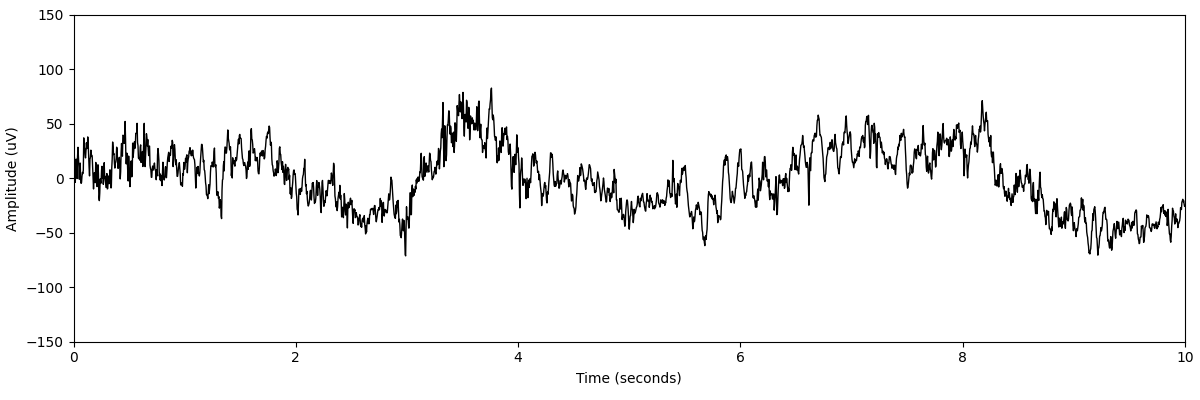

In [8]:
events_pipe.slow_waves.plot_detection()

## Rapid eye movements detection

In [9]:
events_pipe.rem_detect(
    loc_chname="E46",
    roc_chname="E10",
    include=4,
    freq_rem=(0.5, 5),
    duration=(0.3, 1.2),
    amplitude=(50, 325),
    remove_outliers=False,
    save=True
)

Setting 214732 of 2229773 (9.63%) samples to NaN, retaining 2015041 (90.37%) samples.
Setting 214732 of 2229773 (9.63%) samples to NaN, retaining 2015041 (90.37%) samples.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


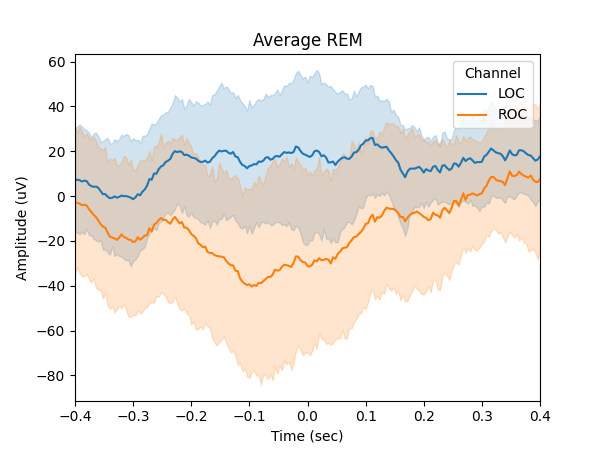

In [10]:
events_pipe.plot_rems_average(save=True)

interactive(children=(IntSlider(value=0, description='Epoch:', layout=Layout(align_items='center', justify_con…

<function yasa.detection._DetectionResults.plot_detection.<locals>.update(epoch, amplitude, channel, win_size, filt)>

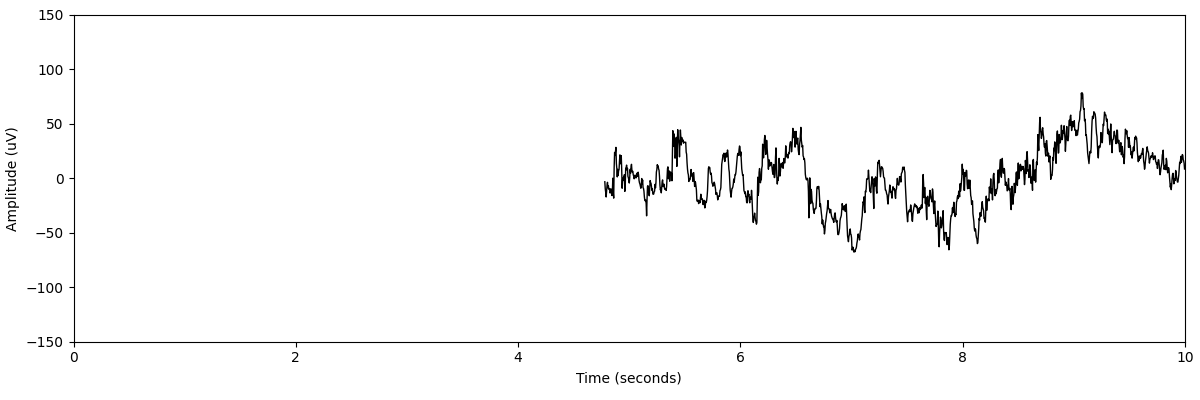

In [11]:
events_pipe.rems.plot_detection()